# **NLP - Análise de Sentimentos**

O objetivo desde notebook é apresentar a análise de sentimentos em portugues.  De forma simples e clara, seguindo as etapas básicas de um projeto de Data Science.

Autor: Wellington Dantas (https://wellingtondantas.com.br)

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.utils import shuffle

## Aquisição de dados

Os dataset foi baixado do site Kaggle. 

link: https://www.kaggle.com/luisfredgs/imdb-ptbr

IMDB PT-BR
Tradução do dataset IMdb para o português

In [2]:
df = pd.read_csv('data/imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


#### Qual a quantidade de comentários?

In [3]:
df.shape[0]

49459

#### Quais os sentimentos encontrados?

In [4]:
np.unique(df.sentiment)

array(['neg', 'pos'], dtype=object)

#### Existem dados faltantes?

In [5]:
df.isnull().values.any()

False

## Visualização de dados

In [6]:
# Contagem dos sentimentos das classes
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [7]:
# Muda as classes para um valor numérico
df['sentiment'] = df['sentiment'].map({'neg':0, 'pos':1})
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


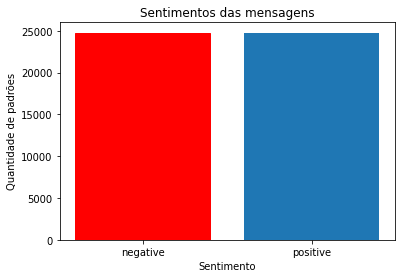

In [8]:
# Rotulo das classes
y = ['negative', 'positive']
x = df.sentiment.value_counts()


# Criando uma figura
barlist = plt.bar(y, x)

# Configurando cor
barlist[0].set_color('r')

# Configurando o cabeçalho
plt.xlabel('Sentimento')
plt.ylabel('Quantidade de padrões')
plt.title('Sentimentos das mensagens')

plt.show()

**OBS:** **<font color='red'>As classes de sentimentos estão balanceadas</font>**

## Pré-processamento de dados

In [9]:
# Faz copia do DataFrame
df1 = df.copy()
df1.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


In [10]:
# Transforma todo o texto em minúsculo
df1['texto'] = [i.lower() for i in df['text_pt']]
df1.head()

,id,text_en,text_pt,sentiment,texto
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"mais uma vez, o sr. costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,nem mesmo os beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,filmes de fotos de latão não é uma palavra apr...


In [11]:
# Excluir colunas que não vamos precisar
df1.drop(['id','text_en', 'text_pt'], axis='columns', inplace=True)

# Renomeia a coluna 'sentiment'
df1.rename(columns={'sentiment': 'sentimento'}, inplace = True)
df1

,sentimento,texto
0,0,"mais uma vez, o sr. costner arrumou um filme p..."
1,0,este é um exemplo do motivo pelo qual a maiori...
2,0,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,0,nem mesmo os beatles puderam escrever músicas ...
4,0,filmes de fotos de latão não é uma palavra apr...
...,...,...
49454,1,"como a média de votos era muito baixa, e o fat..."
49455,1,o enredo teve algumas reviravoltas infelizes e...
49456,1,estou espantado com a forma como este filme e ...
49457,1,a christmas together realmente veio antes do m...


In [12]:
# Mistura os dados
df2 = shuffle(df1)
df2

,sentimento,texto
16964,1,este é um filme de guerra clássico. um dos mel...
43241,1,"""bleak house"" é de longe a melhor adaptação de..."
43184,1,anos atrás eu tive a sorte de ter visto esta j...
14061,1,como pai de quatro filhos na faixa dos 40 anos...
41269,1,"realmente bom filme de terror com os maiores, ..."
...,...,...
7754,0,este filme é absolutamente terrível ... defini...
882,0,parece-me que joe estevez passa a maior parte ...
46982,1,"atores intensos como bruce dern, jason patrick..."
31382,0,"""phantasm"" de 1979 foi um filme horror altamen..."


**OBS:** **<font color='red'>No pre-processamento muitas limpezas poderiam ser feitas a mais, como limpeza de caracteres especiais</font>**

## Processamento de dados

In [13]:
# Separa os dados em atributo e target
X = df2['texto']
y = df2['sentimento']

In [14]:
# Separa os dados em treino e teste na proporção de 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# Instância classe de vetorização
vectorizer = CountVectorizer(analyzer = "word")

# Transforma os dados de treinamento em atributos vetorizados
X_train_freq = vectorizer.fit_transform(X_train)

# Transforma os dados de treino em atributos vetorizados
X_teste_freq = vectorizer.transform(X_test)

#### **Algoritmos de IA**

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4998
           1       0.86      0.83      0.84      4894

    accuracy                           0.85      9892
   macro avg       0.85      0.85      0.85      9892
weighted avg       0.85      0.85      0.85      9892

Acurácia: 0.8487666801455722


Text(0.5, 24.0, 'Classe Predita')

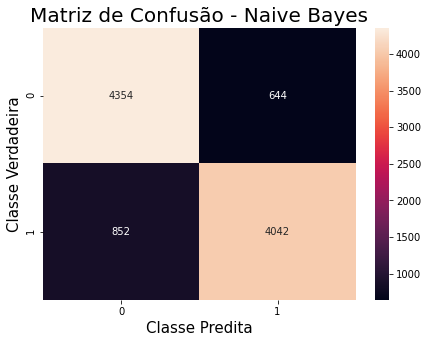

In [16]:
# Instância o algoritmo
modelo = MultinomialNB()

# Treina o modelo
modelo.fit(X_train_freq, y_train)

# Prediz o modelo
results = modelo.predict(X_teste_freq)

# Relatorio do modelo
print(classification_report(y_test, results))

# Acurácia do modelo
print('Acurácia:', accuracy_score(y_test, results))

# Apresenta a matriz de confusão
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, results), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Naive Bayes", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4998
           1       0.86      0.87      0.86      4894

    accuracy                           0.86      9892
   macro avg       0.86      0.86      0.86      9892
weighted avg       0.86      0.86      0.86      9892

Acurácia: 0.8633238980994743


Text(0.5, 24.0, 'Classe Predita')

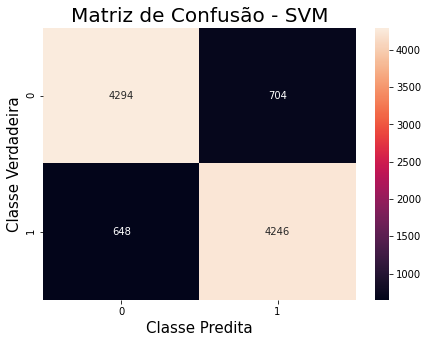

In [17]:
# Instância o algoritmo
modelo = LinearSVC()

# Treina o modelo
modelo.fit(X_train_freq, y_train)

# Prediz o modelo
results = modelo.predict(X_teste_freq)

# Relatorio do modelo
print(classification_report(y_test, results))

# Acurácia do modelo
print('Acurácia:', accuracy_score(y_test, results))

# Apresenta a matriz de confusão
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, results), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - SVM", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4998
           1       0.84      0.84      0.84      4894

    accuracy                           0.84      9892
   macro avg       0.84      0.84      0.84      9892
weighted avg       0.84      0.84      0.84      9892

Acurácia: 0.8445208249090174


Text(0.5, 24.0, 'Classe Predita')

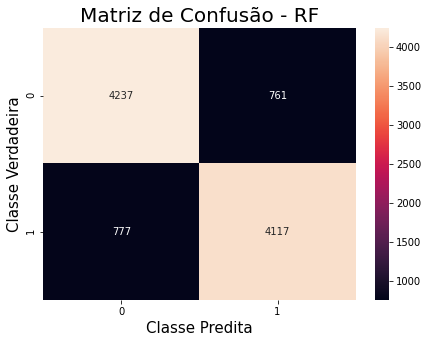

In [18]:
# Instância o algoritmo
modelo = RandomForestClassifier()

# Treina o modelo
modelo.fit(X_train_freq, y_train)

# Prediz o modelo
results = modelo.predict(X_teste_freq)

# Relatorio do modelo
print(classification_report(y_test, results))

# Acurácia do modelo
print('Acurácia:', accuracy_score(y_test, results))

# Apresenta a matriz de confusão
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, results), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - RF", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4998
           1       0.88      0.88      0.88      4894

    accuracy                           0.88      9892
   macro avg       0.88      0.88      0.88      9892
weighted avg       0.88      0.88      0.88      9892

Acurácia: 0.8819247877072381


Text(0.5, 24.0, 'Classe Predita')

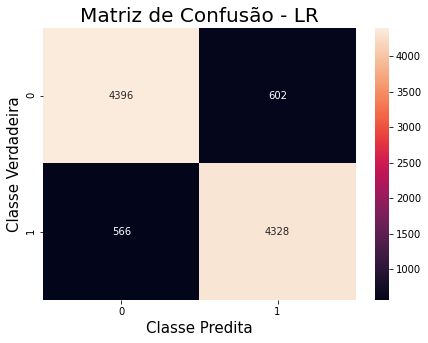

In [19]:
# Instância o algoritmo
modelo = LogisticRegression(random_state=0)

# Treina o modelo
modelo.fit(X_train_freq, y_train)

# Prediz o modelo
results = modelo.predict(X_teste_freq)

# Relatorio do modelo
print(classification_report(y_test, results))

# Acurácia do modelo
print('Acurácia:', accuracy_score(y_test, results))

# Apresenta a matriz de confusão
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, results), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - LR", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

## Apresentação/Avaliação dos resultados

O algorítmo que obteve o melhor desempenho foi o LogisticRegression.

Acurácia: 87.59%

#### Testando o modelo ad hoc

In [20]:
comments = ['eu gostei muito do filme, eu não vou perder por nada o próximo', 
            'filme ruim, não mostrou nada interessante',
            'péssimo filme, sem lógica']

In [21]:
comments_freq = vectorizer.transform(comments)

results = modelo.predict(comments_freq)

In [22]:
results

array([1, 0, 0], dtype=int64)

In [23]:
for i in results:
    if i == 1 :
        print('Positivo')
    else:
        print('Negativo')

    

Positivo
Negativo
Negativo


### FIM